# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering


## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [356]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. Collecting the data

Training dataset and testing dataset are given by Kaggle
you can download from github: [https://github.com/minsuk-heo/kaggle-titanic/tree/master](https://github.com/minsuk-heo/kaggle-titanic)  
or you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data).

Also, you can read the csv file directly from this link:
https://raw.githubusercontent.com/lab-ml-itba/Arboles-de-decision/master/data/train.csv

### Load train dataset using the [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api) library

In [357]:
import pandas as pd

train = pd.read_csv("train.csv")

## 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [358]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp:	# of siblings / spouses aboard the Titanic
- parch:	# of parents / children aboard the Titanic
- ticket:	Ticket number
- cabin:	Cabin number
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset:

In [359]:
train.shape

(891, 12)

And some info about the data:

In [360]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Also, some statistics of Numerical columns (Data profiling)


In [361]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that *Age* value is missing for many rows.

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

In [362]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

### Import python libs for visualization

In [363]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [364]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

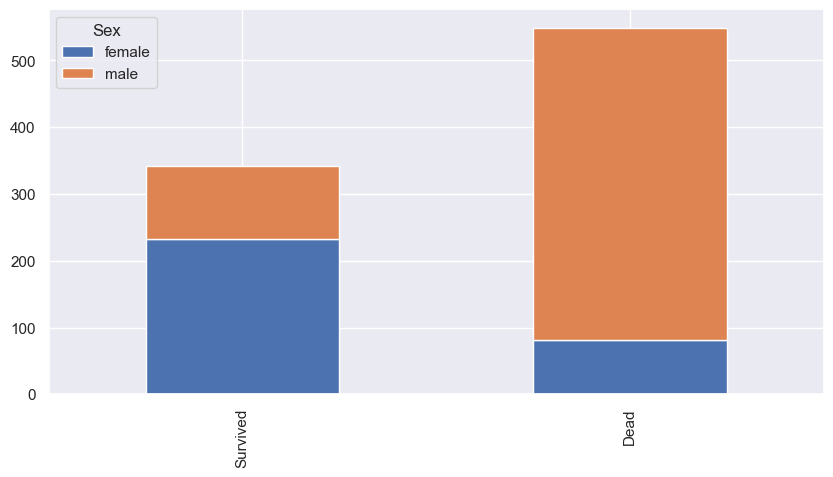

In [365]:
bar_chart('Sex')

### 1) Realizar un gráfico de barras para para la variable "Pclass"

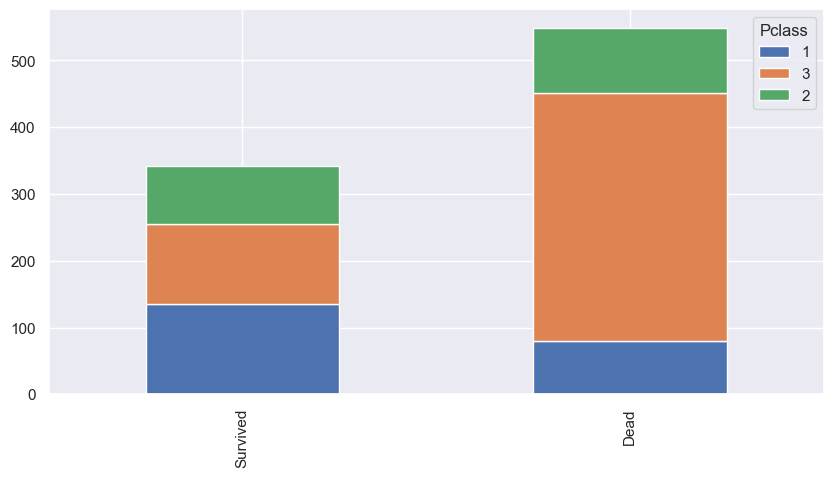

In [366]:
bar_chart('Pclass')

### 2) ¿Qué clase sobrevivió mas?

In [367]:
class_survived = train.groupby(["Pclass"]).Survived.sum()
print(f"La clase con mayor números de sobrevivientes fue la {class_survived.idxmax()}")
print(class_survived)

La clase con mayor números de sobrevivientes fue la 1
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


### 3) ¿Qué clase falleció mas?

In [368]:
class_not_survived = train.loc[train.Survived==0].groupby(["Pclass"]).Survived.count()
print(f"La clase con mayor números de fatalidades fue la {class_not_survived.idxmax()}")
print(class_not_survived)

La clase con mayor números de fatalidades fue la 3
Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64


### 4) Realizar un gráfico de barras para para la variable "SibSp"

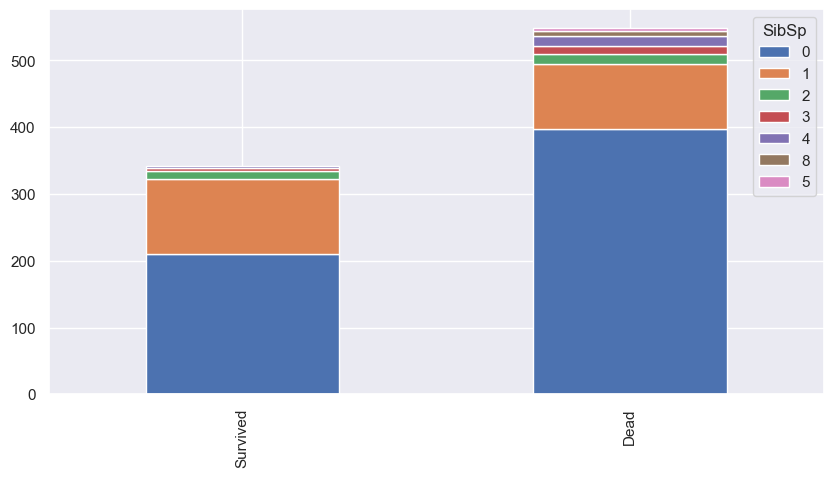

In [369]:
bar_chart("SibSp")

4) Seleccione las verdaderas:

a) Las personas pertenecientes a familias numerosas en general fallecieron  
b) Las personas solas en general fallecieron   
c) Las personas solas en general sobrevivieron   
d) Las personas pertenecientes a familias numerosas en general Sobrevivieron   

In [370]:
#### Respuesta: Las personas que viajaban solas tuvieron mayor probabilidad de no sobrevivir.

### 5) Realizar un gráfico de barras para para la variable "Parch"

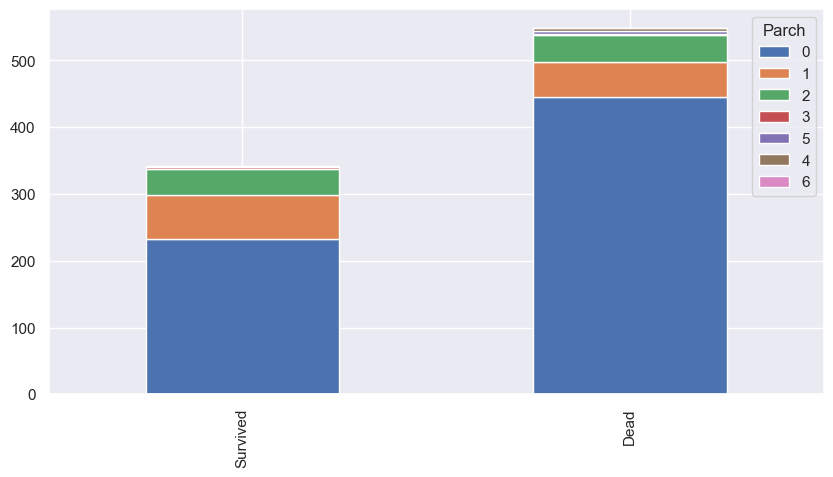

In [371]:
bar_chart("Parch")

In [372]:
train.groupby(["Parch", "Survived"]).Survived.count() / len(train)

Parch  Survived
0      0           0.499439
       1           0.261504
1      0           0.059484
       1           0.072952
2      0           0.044893
       1           0.044893
3      0           0.002245
       1           0.003367
4      0           0.004489
5      0           0.004489
       1           0.001122
6      0           0.001122
Name: Survived, dtype: float64

¿Qué conclusiones podemos sacar a partir del gráfico de 'Parch'?

In [373]:
#### Respuesta: La gente que viajaba sola tuvo un alto porcentaje de muerte.

### 6) Realizar un gráfico de barras para para la variable "Embarked"

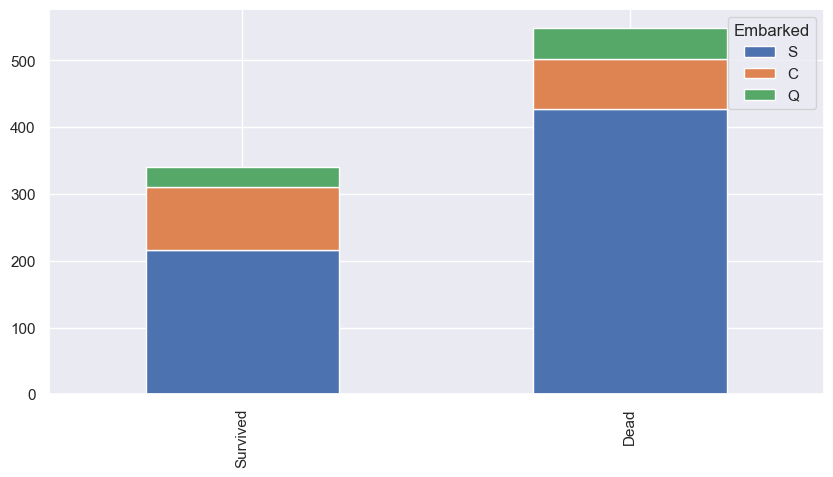

In [374]:
bar_chart("Embarked")

In [375]:
train.groupby(["Embarked", "Survived"]).Survived.count() / len(train)

Embarked  Survived
C         0           0.084175
          1           0.104377
Q         0           0.052750
          1           0.033670
S         0           0.479237
          1           0.243547
Name: Survived, dtype: float64

¿Qué conclusiones podemos sacar a partir del gráfico de 'Embarked'?

In [376]:
#### Respuesta: La gente que partió de Southampton tuvo una probabilidad de muerte mas grande respecto de los demás puertos de origen.
# Los que partieron de C tuvieron mayor chance de sobrevivir.

## 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

### 4.1 How titanic sank?
Sank from the bow of the ship where third class rooms located.
Conclusion, Pclass is key feature for a classifier

In [377]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [378]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 4.2 Crear una nueva columna en el dataset llamada "Title" con el título de la persona (Mr., Mrs., etc.).

**Tip: regex**

In [379]:
train["Title"] = train["Name"].str.extract("([A-Za-z]+)\.")

### 4.3 Mostrar la cantidad de valores encontrados para cada uno de los "Titles" determinados anteriormente.

In [380]:
title_value_counts = train.Title.value_counts().reset_index()
print(title_value_counts)

       Title  count
0         Mr    517
1       Miss    182
2        Mrs    125
3     Master     40
4         Dr      7
5        Rev      6
6       Mlle      2
7      Major      2
8        Col      2
9   Countess      1
10      Capt      1
11        Ms      1
12       Sir      1
13      Lady      1
14       Mme      1
15       Don      1
16  Jonkheer      1


Cuantas veces apareció:
    
Mr:    
Miss:   
Mrs:  
¿?

In [381]:
#### Respuesta:
for t in title_value_counts.itertuples():
    print(f"{t[1]} aparece {t[2]} veces")

Mr aparece 517 veces
Miss aparece 182 veces
Mrs aparece 125 veces
Master aparece 40 veces
Dr aparece 7 veces
Rev aparece 6 veces
Mlle aparece 2 veces
Major aparece 2 veces
Col aparece 2 veces
Countess aparece 1 veces
Capt aparece 1 veces
Ms aparece 1 veces
Sir aparece 1 veces
Lady aparece 1 veces
Mme aparece 1 veces
Don aparece 1 veces
Jonkheer aparece 1 veces


### 4.4 Title


#### 4.4.1 Convertir datos "Categoricos" a "Numéricos" (Data Encoding)

Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3

In [382]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2}

train["Title"] = train["Title"].map(title_mapping)

train["Title"].fillna(3, inplace=True)

train.Title.value_counts()


Title
0.0    517
1.0    182
2.0    125
3.0     67
Name: count, dtype: int64

In [383]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2.0


Realizar el gráfico de barras para para la variable "Title"

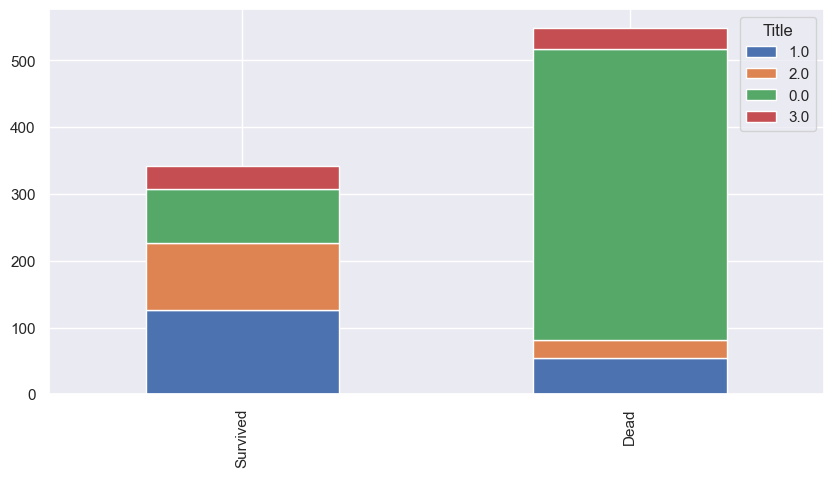

In [384]:
bar_chart("Title")

In [385]:
train.groupby(["Title", "Survived"]).Survived.count() / len(train)

Title  Survived
0.0    0           0.489338
       1           0.090909
1.0    0           0.061728
       1           0.142536
2.0    0           0.029181
       1           0.111111
3.0    0           0.035915
       1           0.039282
Name: Survived, dtype: float64

¿Qué conclusiones podemos sacar a partir del gráfico de la columna 'Title'?

In [386]:
#### Respuesta: Los hombres mayores de edad ("Mr") tuvieron una tasa de mortalidad alta. Las mujeres tuvieron mejor probabilidad de supervivencia. 

#### 4.4.2 Eliminar la columna 'Name' del dataset

In [387]:
train.drop(columns="Name", inplace=True)

In [388]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


### 4.5 Sex

#### 4.5.1 Convertir datos "Categoricos" a "Numéricos" (Data Encoding)

male: 0   
female: 1

In [389]:
train["Sex"] = train["Sex"].map({"male": 0,
                                 "female": 1})

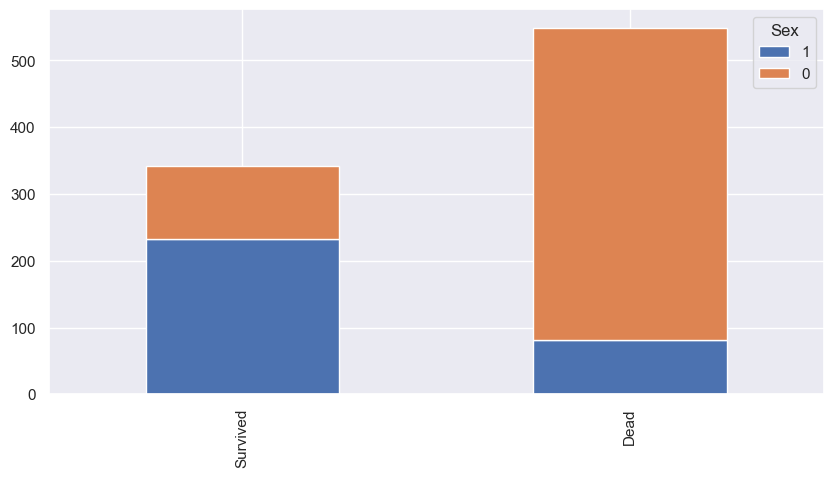

In [390]:
bar_chart('Sex')

¿Tiene alguna correlación con la columna 'Title'?, ¿Y con la columna 'Pclass'?

**Tip: ver correlación entre 2 columnas**

In [391]:
train[["Sex", "Title", "Pclass"]].corr()

,Sex,Title,Pclass
Sex,1.00000,0.557890,-0.131900
Title,0.55789,1.000000,-0.164205
Pclass,-0.13190,-0.164205,1.000000


### 4.4 Age

#### 4.4.1 Algunas edades son nulas en el dataset, necesitamos generarlos a partir de otros valores (Data Imputation)

In [392]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2.0


#### 4.4.2 Rellenar los valores faltantes de la columna 'Age' con el valor de la mediana (median) de esa columna

In [393]:
train.Age.fillna(train.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [394]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


#### 4.4.3 Binning


Convertir la edad numérica a variables categóricas:

Menor a 16 años: 0  
Entre 17 y 26 años: 1  
Entre 27 y 36 años: 2  
Eentre 37 y 62 años: 3  
Mayor a 62 años: 4

In [395]:
age_bins = [0, 17, 27, 37, 62]
train["AgeCat"] = pd.cut(train.Age, bins=age_bins)

In [396]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,"(17.0, 27.0]"
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0,"(37.0, 62.0]"
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,"(17.0, 27.0]"
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0,"(27.0, 37.0]"
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0,"(27.0, 37.0]"
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0.0,NaN
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0.0,"(37.0, 62.0]"
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3.0,"(0.0, 17.0]"
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2.0,"(17.0, 27.0]"
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2.0,"(0.0, 17.0]"


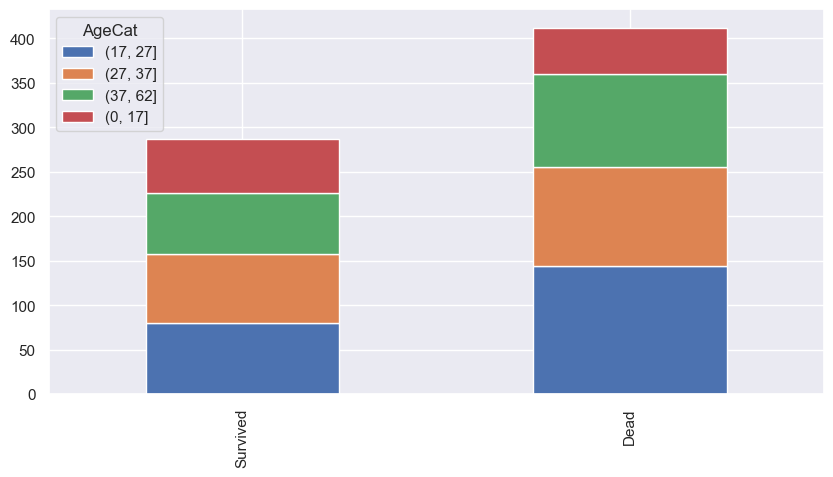

In [397]:
bar_chart('AgeCat')

### 4.5 Embarked
Embarked: Port of Embarkation.   
C = Cherbourg, Q = Queenstown, S = Southampton

#### 4.5.1 Rellenar los valores faltantes

<Axes: >

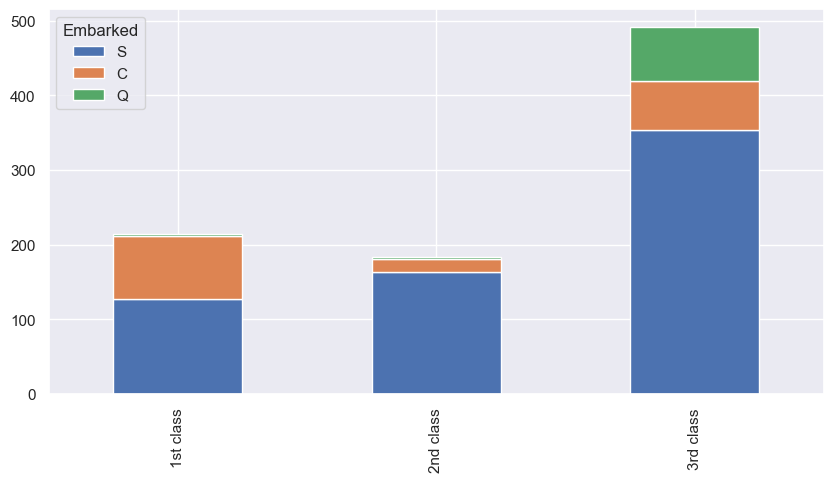

In [398]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

En base al gráfico anterior, con qué criterio rellenaría los datos faltantes del puerto de embarque?

S para todas las clases.  
C para primera clase, S para el resto.  
Q para tercera clase, S para el resto.  

In [399]:
#### Respuesta: Utilizaría el lugar de embarque mas probable -> "S"

Rellene los datos faltantes del puerto de embarque con la ocpión elegida

In [400]:
train.Embarked.fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [401]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,"(17, 27]"
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0,"(37, 62]"
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,"(17, 27]"
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0,"(27, 37]"
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0,"(27, 37]"


#### 4.5.2 Convertir datos "Categoricos" a "Numéricos" (Data Encoding)

S : 0  
C : 1  
Q : 2

In [402]:
train["Embarked"] = train["Embarked"].map({"S": 0,
                                            "C": 1,
                                            "Q":2})

In [403]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,"(17, 27]"
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1.0,2.0,"(37, 62]"
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0,"(17, 27]"
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0.0,2.0,"(27, 37]"
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0,0.0,"(27, 37]"


### 4.6 Cabin

In [404]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,"(17, 27]"
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1.0,2.0,"(37, 62]"
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0,"(17, 27]"
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0.0,2.0,"(27, 37]"
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0,0.0,"(27, 37]"


In [405]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

#### 4.6.1 Modificar la columna Cabin y obtener solo la primer letra. Ejemplos:   
B96  -> B  
E101 -> E

In [406]:
train.Cabin = train.Cabin.str[0]
train.Cabin.value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

<Axes: >

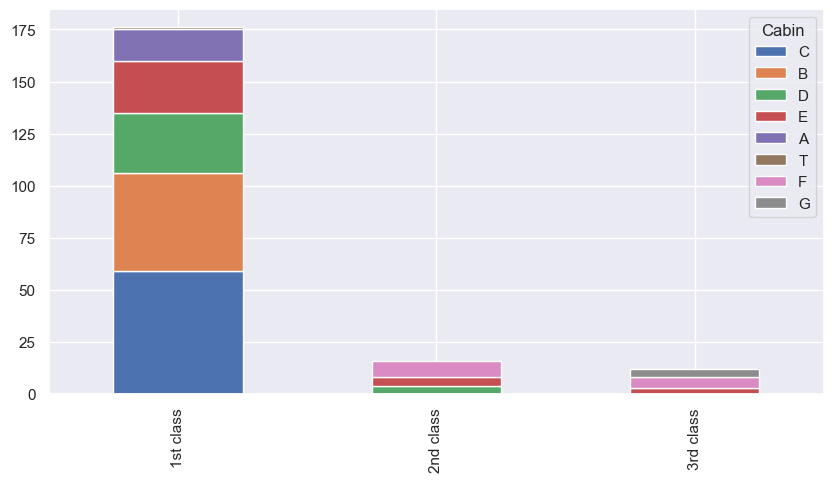

In [407]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

#### 4.6.2 Mapear los valores del camarote (cabin) segun el siguiente criterio:

"A": 0  
"B": 0.4   
"C": 0.8   
"D": 1.2   
"E": 1.6  
"F": 2  
"G": 2.4  
"T": 2.8  

In [408]:
train.Cabin = train.Cabin.map({"A": 0 , 
                                    "B": 0.4,   
                                    "C": 0.8,   
                                    "D": 1.2,   
                                    "E": 1.6,  
                                    "F": 2,  
                                    "G": 2.4,  
                                    "T": 2.8
                                    })

In [409]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,"(17, 27]"
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1.0,2.0,"(37, 62]"
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0,"(17, 27]"
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,0.0,2.0,"(27, 37]"
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0,0.0,"(27, 37]"


#### 4.6.3 Rellenar los valores faltantes con la mediana de los camarotes (cabin) de cada clase (Pclass)

In [410]:
train.groupby(["Pclass"]).Cabin.median()

Pclass
1    0.8
2    1.8
3    2.0
Name: Cabin, dtype: float64

In [411]:
train.Cabin.fillna(train.groupby(["Pclass"]).Cabin.transform("median"), inplace=True)

In [412]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0.0,0.0,"(17, 27]"
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1.0,2.0,"(37, 62]"
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0.0,1.0,"(17, 27]"
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,0.0,2.0,"(27, 37]"
4,5,0,3,0,35.0,0,0,373450,8.0500,2.0,0.0,0.0,"(27, 37]"


<Axes: >

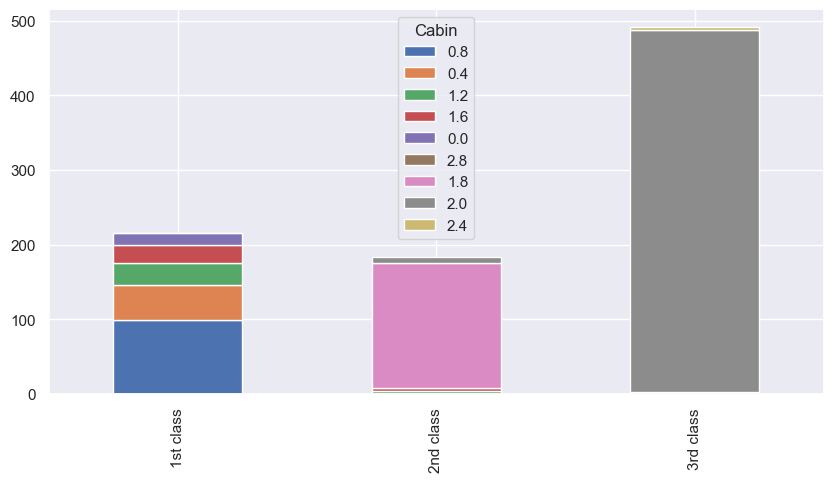

In [413]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))